<a href="https://colab.research.google.com/github/Roshan-234/ML-Projects/blob/main/Image_Classification_Using_CIFAR_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                       

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 75s 47ms/step - loss: 1.5504 - accuracy: 0.4335 - val_loss: 1.3156 - val_accuracy: 0.5187
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1889 - accuracy: 0.5800 - val_loss: 1.0889 - val_accuracy: 0.6189
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0353 - accuracy: 0.6373 - val_loss: 1.0101 - val_accuracy: 0.6486
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9403 - accuracy: 0.6723 - val_loss: 0.9500 - val_accuracy: 0.6694
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8672 - accuracy: 0.6975 - val_loss: 0.9844 - val_accuracy: 0.6638
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8169 - accuracy: 0.7144 - val_loss: 0.9269 - val_accuracy: 0.6819
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7646 - accuracy: 0.7326 - val_loss: 0.8904 - val_accura

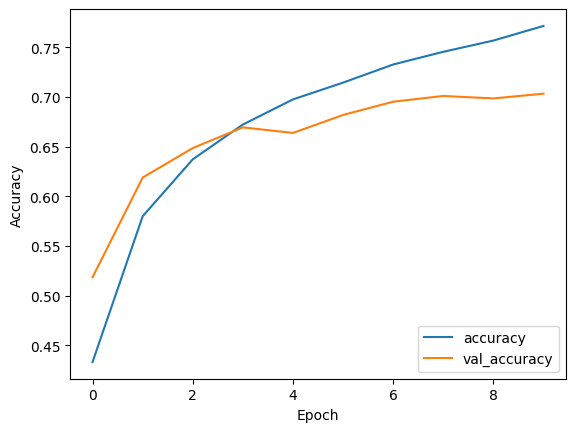

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
def load_and_preprocess_data():
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    train_images, test_images = train_images / 255.0, test_images / 255.0
    return train_images, train_labels, test_images, test_labels

# Define the CNN model architecture
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Compile and train the model
def train_model(model, train_images, train_labels, test_images, test_labels, epochs=10):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return history

# Plot the training and validation accuracy curves
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

# Main function
if __name__ == "__main__":
    train_images, train_labels, test_images, test_labels = load_and_preprocess_data()
    model = create_model()
    model.summary()
    history = train_model(model, train_images, train_labels, test_images, test_labels, epochs=10)
    plot_accuracy(history)
